In [4]:
import numpy as np
import jax
import jax.numpy as jnp

from jaxsnn.base import funcutils
from jaxsnn.base import explicit
from jaxsnn.base import implicit

In [5]:
explicit_terms=lambda x: jnp.stack([x[1], -x[0]])
projection=lambda x: x
dt=1e-2
inner_steps=20
outer_steps=200
initial_state=np.ones(2)

In [9]:
time = dt * inner_steps * (1 + np.arange(outer_steps))

equation = explicit.ExplicitConstrainedODE(explicit_terms, projection)
step_fn = explicit.heun_rk2(equation, dt)
integrator = funcutils.trajectory(funcutils.repeated(step_fn, inner_steps), outer_steps)
_, actual = integrator(initial_state)

AttributeError: module 'jaxsnn.base.explicit' has no attribute 'ExplicitConstrainedODE'

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


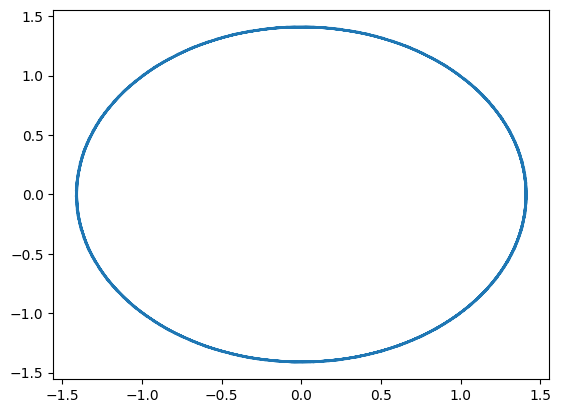

In [ ]:
import matplotlib.pyplot as plt

plt.plot(actual[:,0], actual[:,1])
plt.show()

In [5]:

def controlled_dynamics(x, u):
    return jnp.stack([x[1] + u[0], -x[0] + u[1]])

def projection(x, u):
    return x

def output(x,u):
    return x

equation = explicit.ExplicitConstrainedCDE(
   explicit_terms=controlled_dynamics,
   projection=projection,
   output=output
)

step_fn = explicit.heun_rk2_cde(equation, dt)

step_fn

TypeError: __init__() got an unexpected keyword argument 'output'

In [14]:
integrator = funcutils.controlled_trajectory(step_fn, np.ones((100,2)))

_, actual = integrator(initial_state)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


TracerIntegerConversionError: The __index__() method was called on the JAX Tracer object Traced<ShapedArray(float32[2])>with<DynamicJaxprTrace(level=1/0)>
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError